In [1]:
import pandas as pd
df = pd.read_csv('c:/data/time/kings.dat',header=None,names=['age'])
df.head()

,age
0,60
1,43
2,67
3,50
4,56


<AxesSubplot:>

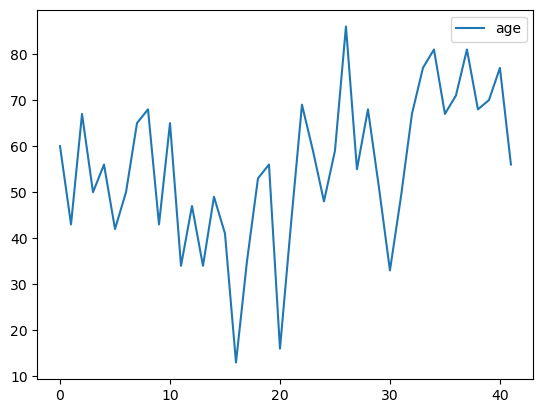

In [2]:
df.plot()

1    25.0
2   -40.0
3    10.0
4    20.0
dtype: float64


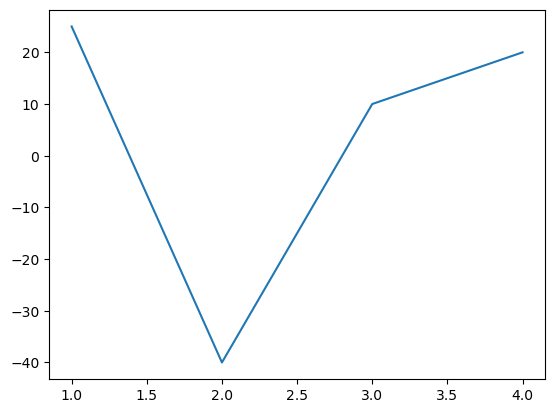

In [19]:
# 1차 차분
import matplotlib.pyplot as plt
a=pd.Series([1025,1050,1010,1020,1040])
b=a.diff(periods=1).iloc[1:]
print(b)
plt.plot(b)

2   -15.0
3   -30.0
4    30.0
dtype: float64


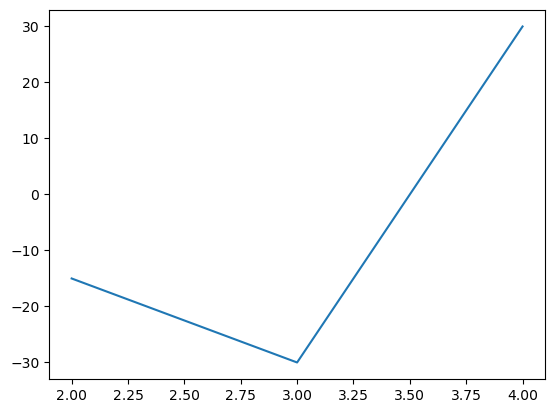

In [20]:
# 2차 차분
a=pd.Series([1025,1050,1010,1020,1040])
b=a.diff(periods=2).iloc[2:]
print(b)
plt.plot(b)

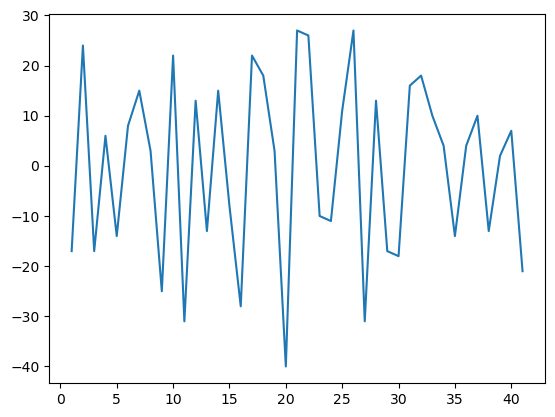

In [4]:
#1차 차분
diff1=df['age'].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
#로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인
diff1=np.log(df['age']).diff(periods=1).iloc[1:]
result = adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#p-value가 0.05보다 작으므로 95% 신뢰수준 하에서 유의함(안정적인 시계열 자료임)

(-7.446856429613951, 5.807660899733685e-11, 2, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 32.20496009678498)
ADF Statistic: -7.446856
p-value: 0.000000


In [7]:
from pmdarima.arima import auto_arima
model = auto_arima(df)
model
#가장 적절한 모형은 arima(0,1,1)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [23]:
#학습용,검증용 구분
train = df[:30]
test = df[30:]
print(len(df['age']))
print(df['age'].values)
print(train.values)
print(test.values)

42
[60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59
 48 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56]
[[60]
 [43]
 [67]
 [50]
 [56]
 [42]
 [50]
 [65]
 [68]
 [43]
 [65]
 [34]
 [47]
 [34]
 [49]
 [41]
 [13]
 [35]
 [53]
 [56]
 [16]
 [43]
 [69]
 [59]
 [48]
 [59]
 [86]
 [55]
 [68]
 [51]]
[[33]
 [49]
 [67]
 [77]
 [81]
 [67]
 [71]
 [81]
 [68]
 [70]
 [77]
 [56]]


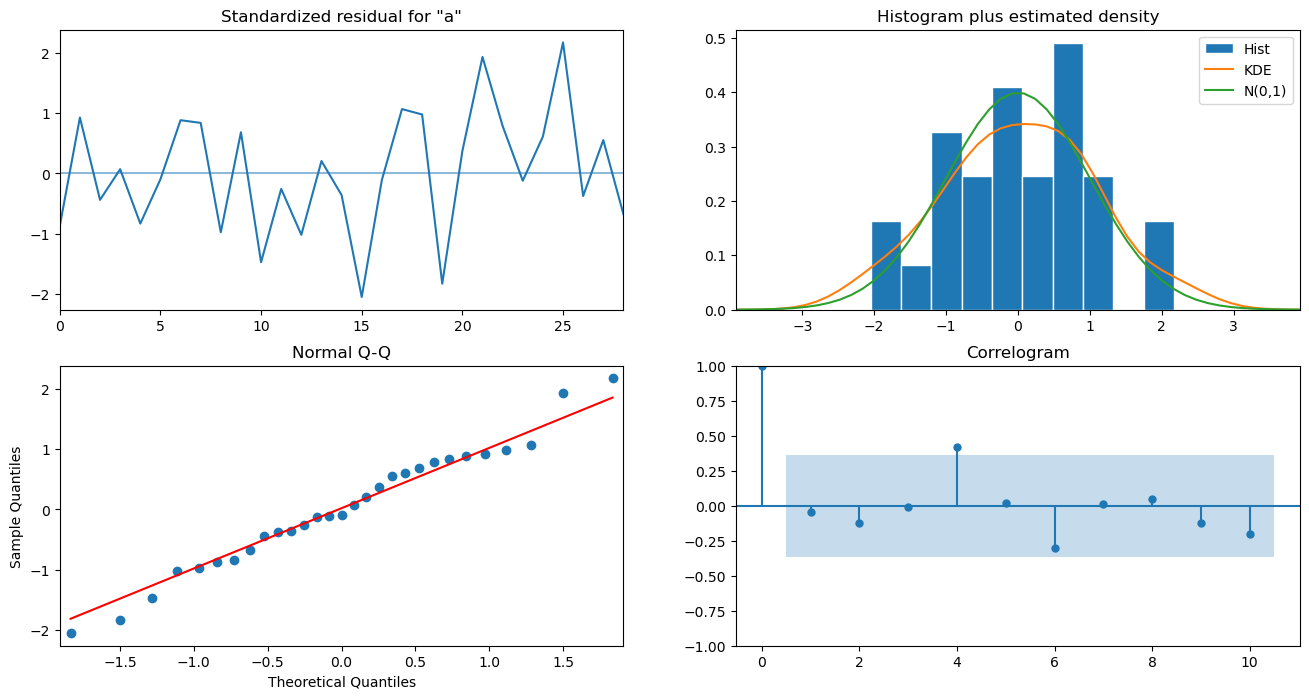

In [16]:
#arima(1,2,1)을 수행할 경우 order=c(1,2,1)로 모형을 생성함
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(0,1,1)).fit()
model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [17]:
predictions = model.predict(start=1, end=len(test), dynamic=False)
predictions.index=len(train)+(predictions.index-1)
predictions

30    59.989111
31    51.115646
32    57.169734
33    54.861844
34    55.195907
35    51.513504
36    51.102642
37    54.818956
38    58.314968
39    54.271040
40    57.097169
41    51.021130
Name: predicted_mean, dtype: float64

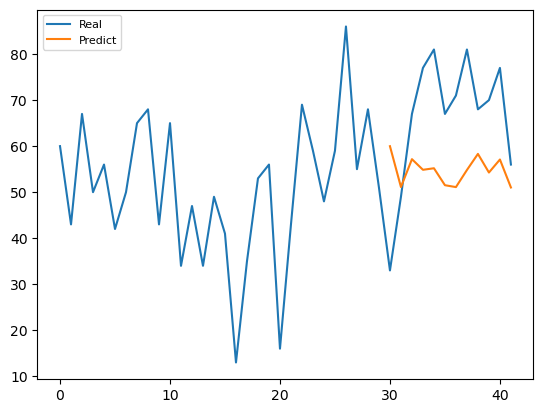

In [18]:
plt.plot(df,label='Real')
plt.plot(predictions,label='Predict')
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test, predictions)
rmse=np.sqrt(mse)
rmse

18.413687584277653